In [15]:
import etl
import models
import plots
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
model = models.Models()

input_file = 'data/full_data_with_timestamp.csv'

train_set, train_labels, valid_set, valid_labels = etl.process_input(input_file)

train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
blueChampionKill,258224.0,0.782565,0.679202,0.000000,0.200000,0.600000,1.200000,4.950000
blueFirstBlood,258224.0,0.481113,0.499644,0.000000,0.000000,0.000000,1.000000,1.000000
redChampionKill,258224.0,0.769928,0.676865,0.000000,0.200000,0.600000,1.150000,4.750000
timeElapsedMS,258224.0,18.396547,11.214036,0.338567,8.579450,16.285608,27.260121,67.351000
blueHasDragonSoul,258224.0,0.037092,0.188987,0.000000,0.000000,0.000000,0.000000,1.000000
percentMinionDiff,258224.0,-0.003441,0.091520,-0.923077,-0.050000,0.000000,0.042994,0.916667
percentJungleMinionDiff,258224.0,-0.006463,0.170827,-0.992908,-0.106061,0.000000,0.090226,0.994565
percentAvgLevelDiff,258224.0,-0.000684,0.037531,-0.333333,-0.024390,0.000000,0.023810,0.259259
percentTotalGoldDiff,258224.0,0.000734,0.078605,-0.454918,-0.052190,0.000000,0.053696,0.373846
heraldKillDiff,258224.0,0.096002,1.094477,-2.000000,0.000000,0.000000,1.000000,2.000000


In [17]:

#model.train(train_set, train_labels)

In [18]:

#model.evaluate(valid_set, valid_labels)

2018/2018 [==============================] - 7s 3ms/step


<Axes: >

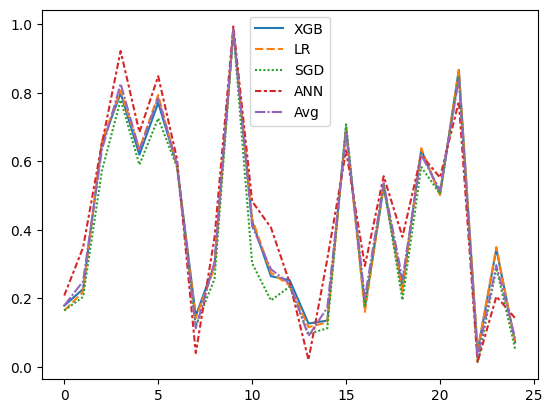

In [19]:


predictions = model.predict(valid_set)

sns.lineplot(data=predictions.iloc[:25])

,XGB,LR,SGD,ANN,Avg
count,64556.000000,64556.000000,64556.000000,6.455600e+04,64556.000000
mean,0.504976,0.505017,0.485830,5.215896e-01,0.504353
std,0.316507,0.321079,0.321568,3.208966e-01,0.317546
min,0.000230,0.000174,0.000109,3.852661e-08,0.000131
25%,0.210881,0.202477,0.182324,2.472733e-01,0.212332
50%,0.524365,0.525877,0.499797,5.526465e-01,0.527200
75%,0.797721,0.806162,0.777315,7.976595e-01,0.793352
max,0.999936,0.999960,0.999934,1.000000e+00,0.999957


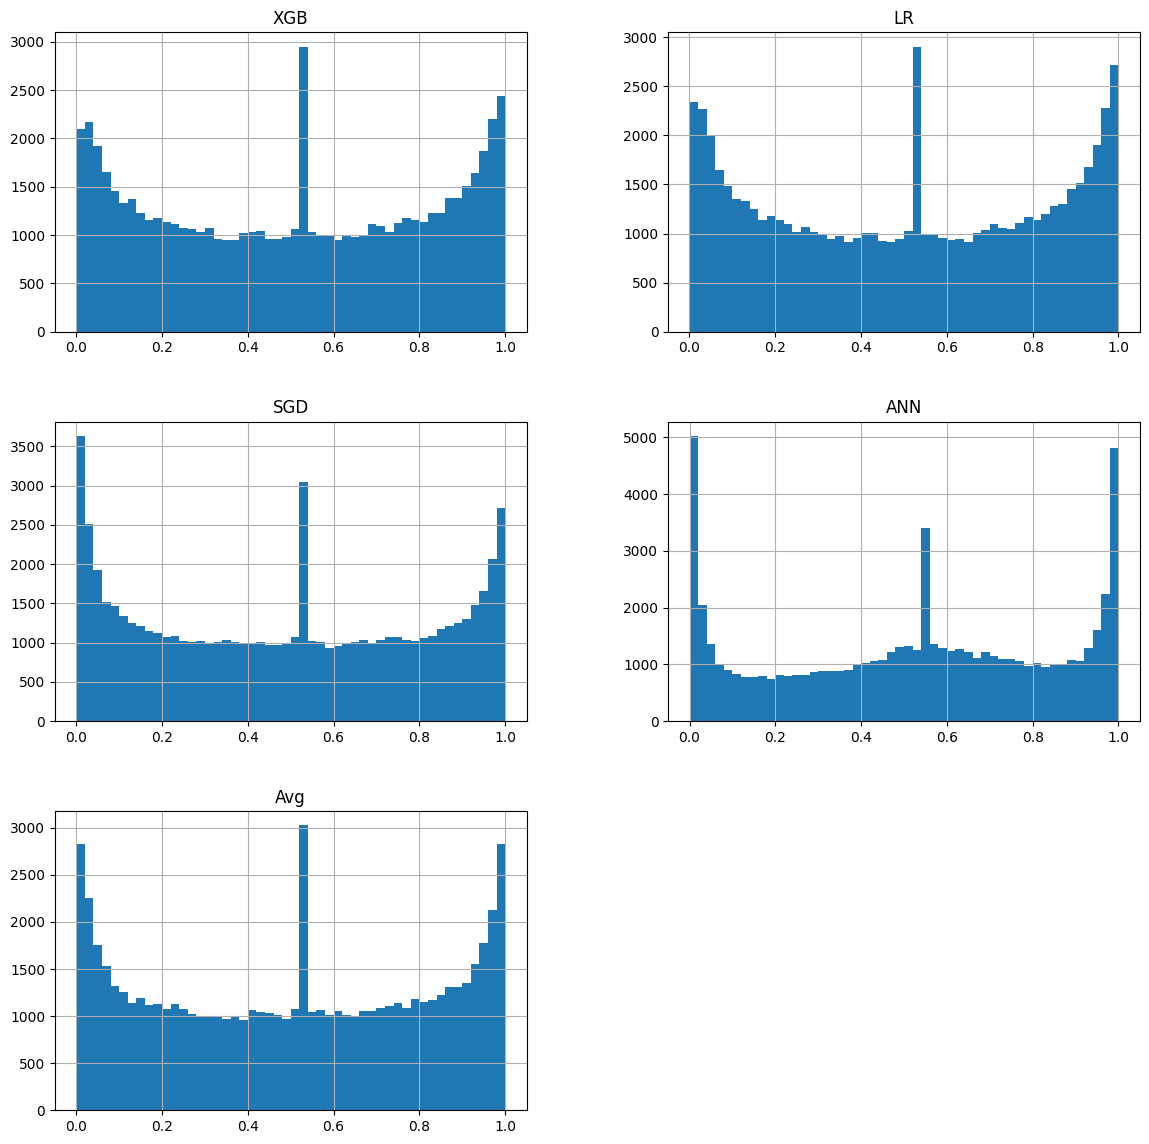

In [20]:
predictions.hist(bins=50, figsize=(14,14))
predictions.describe()

<Axes: ylabel='Count'>

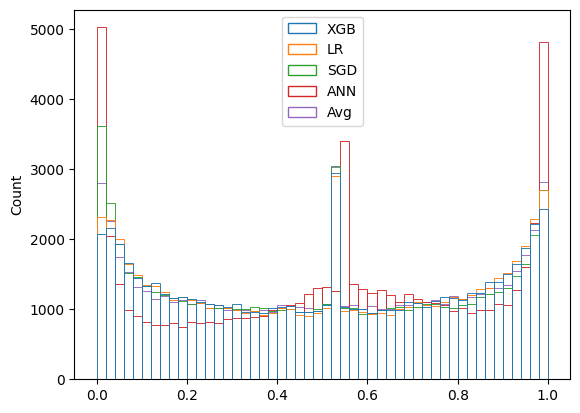

In [21]:
sns.histplot(data=predictions, fill=False, multiple='layer', bins=50)

In [22]:
wins = valid_labels.copy()
wins.reset_index(inplace=True, drop=True)
wins.head()

0    1
1    0
2    0
3    1
4    0
Name: blueWin, dtype: int64

In [23]:
import pandas as pd

pred_with_labels = predictions.copy()

pred_with_labels['wins'] = wins
pred_with_labels.describe().T

,count,mean,std,min,25%,50%,75%,max
XGB,64556.0,0.504976,0.316507,2.295139e-04,0.210881,0.524365,0.797721,0.999936
LR,64556.0,0.505017,0.321079,1.736426e-04,0.202477,0.525877,0.806162,0.999960
SGD,64556.0,0.485830,0.321568,1.094100e-04,0.182324,0.499797,0.777315,0.999934
ANN,64556.0,0.521590,0.320897,3.852661e-08,0.247273,0.552647,0.797659,1.000000
Avg,64556.0,0.504353,0.317546,1.305836e-04,0.212332,0.527200,0.793352,0.999957
wins,64556.0,0.503764,0.499990,0.000000e+00,0.000000,1.000000,1.000000,1.000000


<Axes: >

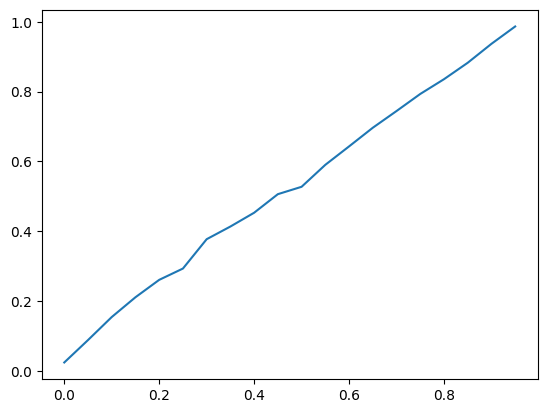

In [37]:
n_bins = 20
input = pred_with_labels[["SGD", "wins"]].values.tolist()

bin_width = 1 / n_bins

x_vals = [i*bin_width for i in range(n_bins)]
y_vals = plots.get_win_percent(n_bins, input)



sns.lineplot(x=x_vals, y=y_vals)

<Axes: >

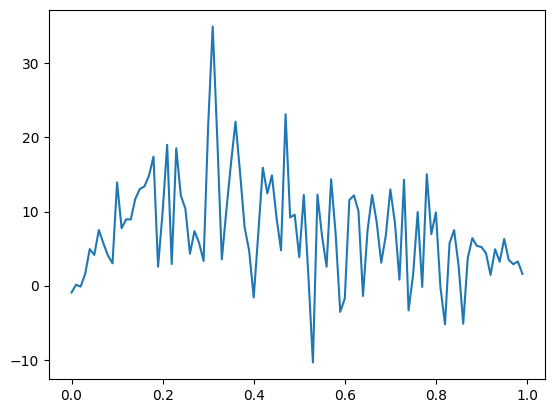

In [25]:
residuals = plots.get_residuals(n_bins, input)
sns.lineplot(x=x_vals, y=residuals)

<Axes: ylabel='Count'>

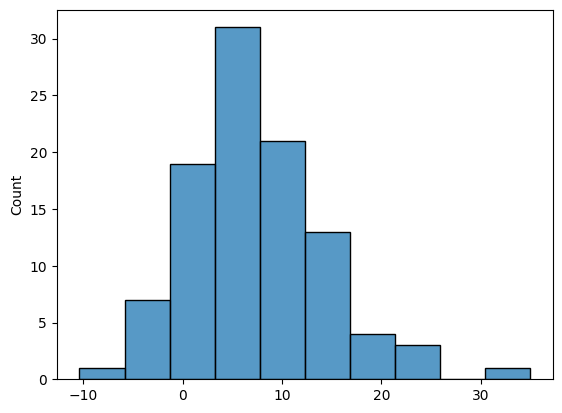

In [39]:
sns.histplot(data=residuals, fill=True, bins=10)

In [32]:
from scipy import stats

stats.kstest(residuals, stats.norm.cdf)

KstestResult(statistic=0.8047043222646324, pvalue=1.64877767519313e-70, statistic_location=2.555899990288021, statistic_sign=-1)

In [31]:
df = plots.make_plotting_df(n_bins, pred_with_labels, 'wins')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,100.0,0.495000,0.290115,0.000000,0.247500,0.495000,0.742500,0.990000
XGB_obs,100.0,0.499162,0.293559,0.002336,0.261666,0.502030,0.761561,0.999047
XGB_exp,100.0,0.499998,0.290098,0.006288,0.252497,0.500141,0.747461,0.993878
XGB_res,100.0,-0.343417,6.429121,-14.347669,-4.809533,-0.422073,4.041476,24.632167
LR_obs,100.0,0.499395,0.288700,0.001970,0.272157,0.486086,0.743718,0.998399
LR_exp,100.0,0.500017,0.290113,0.006029,0.252513,0.500151,0.747561,0.994034
LR_res,100.0,-0.240933,6.681710,-17.534821,-4.160978,-0.674803,4.591619,13.062521
SGD_obs,100.0,0.521615,0.285773,0.003047,0.283773,0.519367,0.763211,0.998535
SGD_exp,100.0,0.500005,0.290127,0.005474,0.252530,0.499965,0.747524,0.994446
SGD_res,100.0,7.463241,6.939573,-10.371571,3.072665,6.831564,12.159811,34.976840


In [38]:
model_residuals = ['XGB', 'LR', 'ANN', 'SGD', 'Avg']

for residual in model_residuals:
    input = input = pred_with_labels[[residual, "wins"]].values.tolist()
    res = plots.get_residuals(n_bins, input)
    print(stats.kstest(res, stats.norm.cdf))

KstestResult(statistic=0.1831224939119671, pvalue=0.45972930940289825, statistic_location=0.903529407772023, statistic_sign=1)
KstestResult(statistic=0.1749716725055983, pvalue=0.5169637134848268, statistic_location=0.9346991889267348, statistic_sign=1)
KstestResult(statistic=0.5784694885817387, pvalue=7.065880953155872e-07, statistic_location=-1.167369896113099, statistic_sign=1)
KstestResult(statistic=0.6011679398889017, pvalue=1.9114915479914611e-07, statistic_location=0.527762597290998, statistic_sign=-1)
KstestResult(statistic=0.14864586453785178, pvalue=0.7146338631154203, statistic_location=-0.003394320754985432, statistic_sign=-1)
